In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [271]:
# The input
datain = np.loadtxt('10a_input.txt',comments=None,delimiter=(','),dtype=str)#usecols=(0,1,3,4))

datain = np.append(datain,datain,axis=1)
datain = np.delete(datain,(2,3),axis=1)

for i in range(datain.shape[0]):
    datain[i,0] = datain[i,0][12:-1]
    datain[i,1] = datain[i,1][3:9]
    datain[i,2] = datain[i,2][21:-1]
    datain[i,3] = datain[i,3][2:-2]

datain = datain.astype(float)
datain.shape

(356, 4)

In [261]:
def costfunction(locationarray):
    return float(np.amax(locationarray[:,1]) - np.amin(locationarray[:,1]))*float(np.amax(locationarray[:,0]) - np.amin(locationarray[:,0]))
    

In [280]:
# define function to calculate a time step
def stepping(location,velocity,steps):
    out = np.zeros_like(location)
    for i in range(location.shape[0]):
        out[i] = location[i] + steps*velocity[i]

    costout = costfunction(out)
    return out,costout

In [404]:
# intialize position step array
position = np.copy(datain)
position = np.delete(position,(2,3),axis=1)
positionorig = np.copy(position)
#position = np.expand_dims(position,2)

# initialiize velocity array
vel = datain[:,2:]

# intialize the cost function
cost = [[costfunction(position)]]

for i in range(10417,10450,1):
    position,costout = stepping(positionorig,vel,i)
    cost.append([costout])
    




In [405]:
np.argmin(cost),cost[np.argmin(cost)],len(cost)

(2, [549.0], 34)

In [408]:
position,finalcost = stepping(positionorig,vel,10418)

In [409]:
xmin = np.amin(position[:,0])
ymin = np.amin(position[:,1])
xmax = np.amax(position[:,0])
ymax = np.amax(position[:,1])

xmin,xmax,ymin,ymax

(181.0, 242.0, 149.0, 158.0)

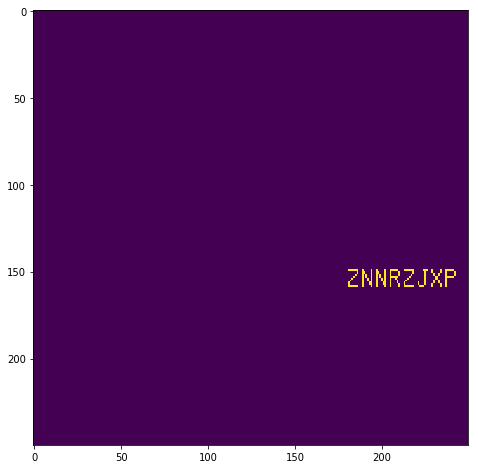

In [410]:
plotarray = np.zeros((250,250))

for row in position:
    plotarray[row.astype(int)[0],row.astype(int)[1]] = 1
    
plt.figure(figsize=(8,8))
plt.imshow(plotarray[:1000,:1000].T)